<a href="https://colab.research.google.com/github/MarycieloMamani/Python_2023/blob/main/Proyecto_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. GRUPO N° 4
INTEGRANTES:
- Marycielo Mamani Ayala
- Noé Castillo Estrella
- Robert Mejía García
- Raúl Quispe Lozano


#### 2. EXPLICACIÓN BREVE DEL ANÁLISIS

Se realizó el análisis de la información de la empresa de telecomunicaciones "OPACO". La información se enfoca en el registro de las ventas de equipos moviles.

In [28]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/proyecto/1. Base_proyecto.xlsx")

base.head(3)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.0339,192.39,-19.3561,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.2203,338.88,16.3403,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.3898,769.94,-44.5502,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. NIVEL BÁSICO


In [29]:
# 1 Descripción general de los datos

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        19552 non-null  float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [30]:
base.dtypes.value_counts()

object     12
float64     5
int64       2
dtype: int64

Como se aprecia se cuenta con 7 varibles numericas, de las cuales 5 son variables de tipo decimal y 2 son de tipo entera, además de 12 variables categoricas.

In [31]:
# 2.- Realice estadísticas descriptivas para las variables que usted crea conveniente

base['Costo'].describe()

count    19552.000000
mean       351.304694
std        252.156903
min         27.970000
25%        157.060000
50%        338.120000
75%        540.405000
max       4271.580000
Name: Costo, dtype: float64

In [32]:
#Mediana

base['Costo'].median()


338.12

In [33]:
#Moda
base['Costo'].mode().round(2)

0    406.99
Name: Costo, dtype: float64

En este caso se tomó la varible tipo Costo, la cual tiene como estadísticas descriptivas, mediana = 338.12, media =  351.304694, desviación estandar =  252.156903, 1er Quartil = 157.060000, 2do Quartil =  338.120000, 3er Quartil =  540.405000, valor mínimo de 27.97 y valor maximo igual a 4271.58.

### 4. NIVEL INTERMEDIO


#### Análisis de datos faltantes

3. Haga análisis de los Valores Faltantes.



In [34]:
base.isnull().any()

Periodo         False
Dia             False
EquipoSim       False
Tipo            False
Subtipo         False
Marca           False
Gama            False
Precio           True
Ingreso         False
Costo           False
Margen          False
Rentabilidad     True
Tipo Venta      False
CanalVenta       True
CadenaDealer     True
Departamento     True
Canal           False
SubCanal        False
Cluster          True
dtype: bool

In [35]:
# Cuántos nulos por cada variable tenemos?
base.isnull().sum()

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen              0
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
dtype: int64

In [37]:
base.isnull().sum().sum()

42710

Se observa que hay valores faltantes en las variables Precio, CanalVenta, CadenaDealer, Departamento y Cluster. En total tenemos 23,158 datos faltantes.

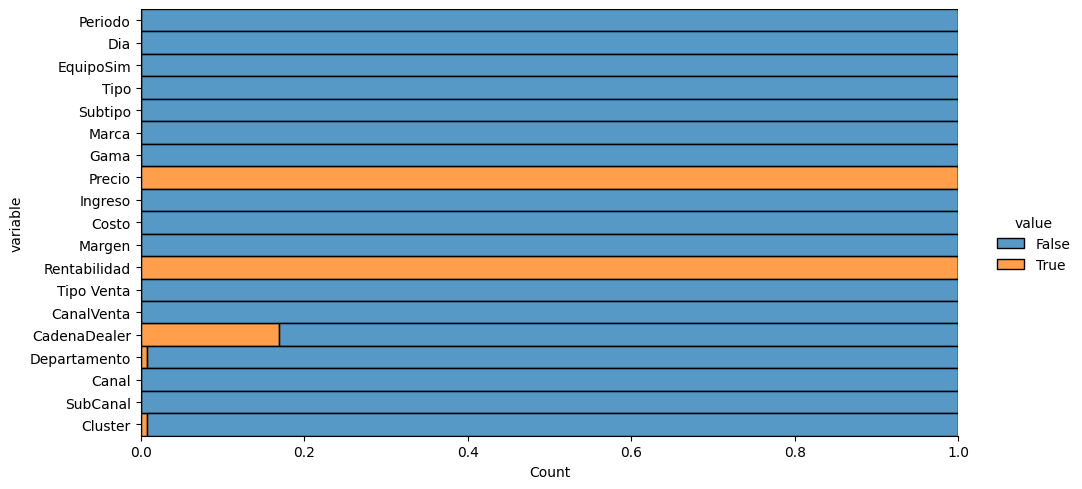

In [38]:
df = base.isnull().melt()

sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

De las variables con datos faltantes encontradas, la variable Rentabilidad será completada con la fórmula mostrada en clase.

In [39]:
# Completamos los datos de la variable "Rentabilidad"
base['Rentabilidad'] = (base['Margen']/base['Costo'])*100

base.head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,-19.35610,-10.060866,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,16.34030,4.821854,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,-44.55020,-5.786191,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,20.82729,58.817537,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,14.85339,42.620918,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


In [40]:
# Eliminaremos la variable Precio debido a que no muestra ningun valor en todas las observaciones del dataframe

base1=base.drop('Precio', axis=1, inplace=True)


In [42]:
base.head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,173.03390,192.39,-19.35610,-10.060866,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,355.22030,338.88,16.34030,4.821854,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,725.38980,769.94,-44.55020,-5.786191,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,56.23729,35.41,20.82729,58.817537,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,49.70339,34.85,14.85339,42.620918,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


In [43]:
base.shape

(19552, 18)

Eliminaremos las observaciones que tengan datos faltantes

In [44]:
bsn = base.dropna()


In [45]:
bsn.shape

(16221, 18)

In [46]:
# Ahora nuestra base d enombre "bsn" ya no cuenta con variables con datos faltantes
bsn.isnull().any()

Periodo         False
Dia             False
EquipoSim       False
Tipo            False
Subtipo         False
Marca           False
Gama            False
Ingreso         False
Costo           False
Margen          False
Rentabilidad    False
Tipo Venta      False
CanalVenta      False
CadenaDealer    False
Departamento    False
Canal           False
SubCanal        False
Cluster         False
dtype: bool

### 4. Visualice los gráficos que sean necesarios.

In [48]:
#Cuál es el canal venta con más ventas?

df = bsn['CanalVenta'].value_counts()
df


GRANDES TIENDAS                  11483
ISLAS                             1998
TIENDAS PROPIAS FRANQUICIADAS     1955
TIENDAS PROPIAS                    264
GRANDES TIENDAS ESPECIALISTAS      264
MAYORISTAS                         132
Otros                               76
Tiendas                             45
CONECTA PLUS                         3
S2S                                  1
Name: CanalVenta, dtype: int64

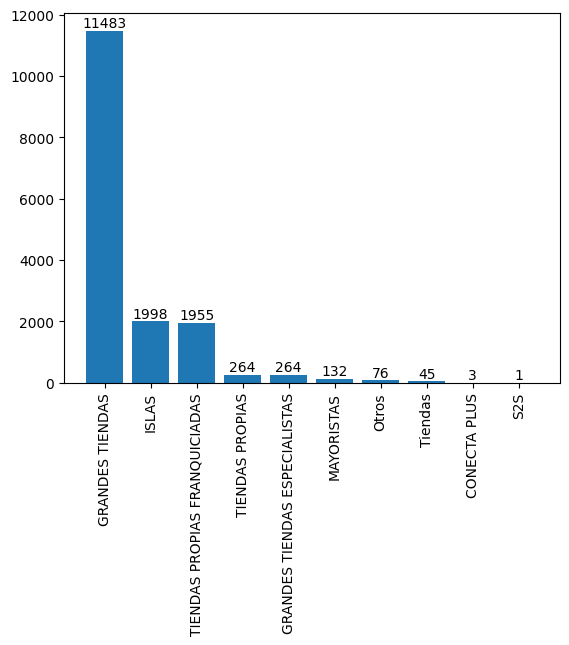

In [50]:
bars = plt.bar(df.index,df.values)

plt.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

En este gráfico hemos observado que las Grandes tiendas tienen el mayor volumen de ventas, siendo las islas y las tiendas propias franquiciadas donde tambien ingresa un volumen representativo de ventas.

In [64]:
#Cuáles es el departamento con más ingresos?

#Primero hacemos nuestro Groupby.
suma = bsn.groupby('Departamento')['Ingreso'].sum().round(2)

print(suma,"\n")

#Segundo separar el index y los values
Departamento  = suma.index
valores = suma.values



Departamento
AMAZONAS            3655.93
ANCASH            162531.38
APURIMAC            7557.87
AREQUIPA          231437.32
AYACUCHO            6873.73
CAJAMARCA         114106.09
CUSCO              71170.51
HUANCAVELICA         899.26
HUANUCO            88173.17
ICA               317642.29
JUNIN             158358.49
LA LIBERTAD       398273.50
LAMBAYEQUE        318206.05
LIMA             2657679.65
LORETO             13394.30
MADRE DE DIOS       2344.85
MOQUEGUA           16658.64
PASCO               2503.39
PIURA             435718.13
PUNO              101269.35
SAN MARTIN         42499.27
TACNA              22783.90
TUMBES             41464.35
UCAYALI           102410.12
Name: Ingreso, dtype: float64 



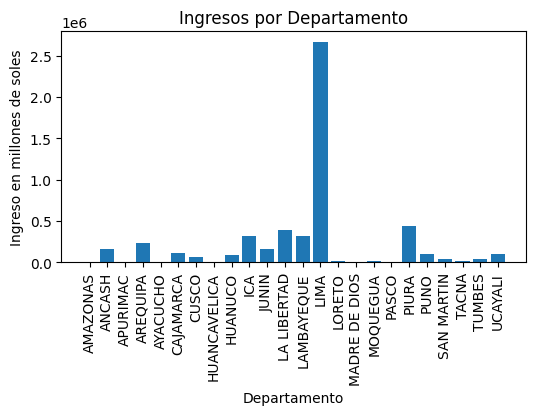

In [65]:
plt.figure(figsize=(6,3))

#Plot
plt.bar(Departamento,valores)

#Titulo:
plt.title("Ingresos por Departamento")

#Etiqueta de los ejes:
plt.xlabel("Departamento")
plt.ylabel("Ingreso en millones de soles")

plt.xticks(rotation=90)
plt.show()

En el siguiente gráfico podemos observar que Lima es el departamento con mayor ingreso. Sin considerar Lima, La libertad y Piura serían los departamentos con mayores ingresos.

<Axes: xlabel='Dia'>

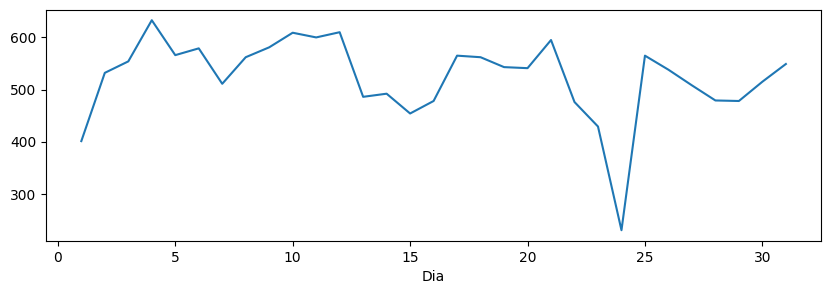

In [66]:
#¿Hay alguna tendencia observable en las ventas a lo largo del mes?
plt.figure(figsize=(10,3))
ventas_por_dia = bsn.groupby('Dia').size()
ventas_por_dia.plot()

Se observa que el día 24 fue el día con menos ventas registradas y el día 4 el día con más ventas registradas.

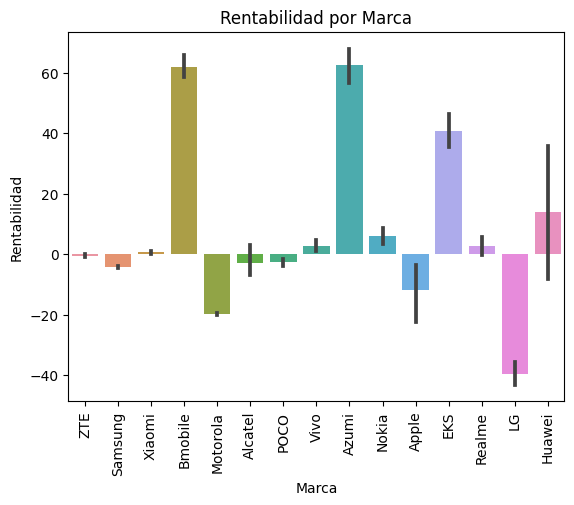

In [55]:
# Gráfico de barras para la rentabilidad por Marca
sns.barplot(x='Marca', y='Rentabilidad', data=bsn)
plt.title('Rentabilidad por Marca')
plt.xlabel('Marca')
plt.ylabel('Rentabilidad')
plt.xticks(rotation=90)
plt.show()

Observamos que las marcas Bmobile y Azumi son las que nos generan mayor rentabilidad, asimismo, Motorrola y LG son las marcas que nos deja mayor rentabilidad negativa.

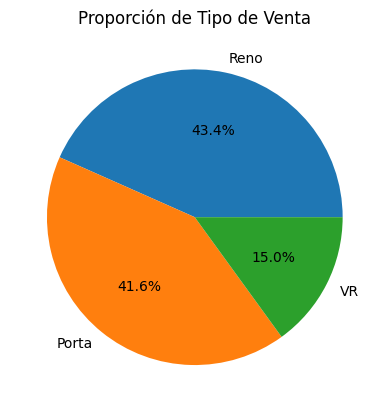

In [67]:
# Cual es el tipo de venta con más ventas?
# Gráfico circular para el tipo de Venta
ventas_por_tipo = bsn['Tipo Venta'].value_counts()
plt.pie(ventas_por_tipo, labels=ventas_por_tipo.index, autopct='%1.1f%%')
plt.title('Proporción de Tipo de Venta')
plt.show()

El tipo de venta más comun o preferido es Reno.

### 5.- Realice un headmap con las variables que usted considere


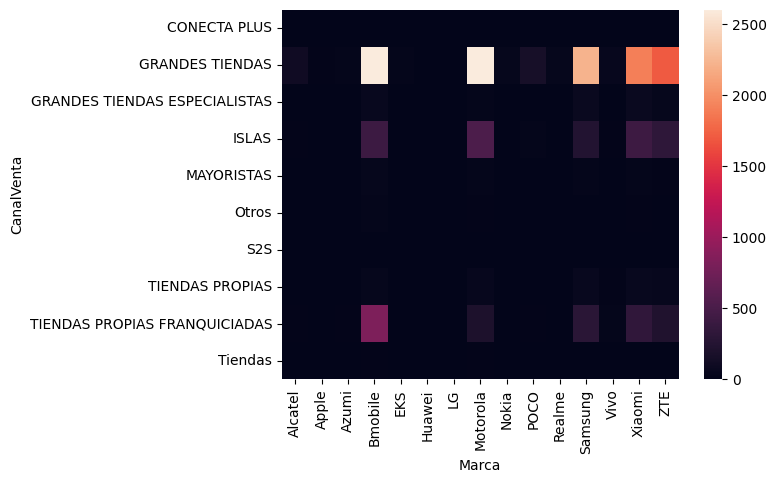

In [ ]:
#¿Hay alguna relación entre el canal de venta y marca?
tab = pd.crosstab(bsn['CanalVenta'],bsn['Marca'])

sns.heatmap(tab)
plt.show()

En el siguiente Headmap podemos observar que en las grandes tiendas los clientes compran más las marcas Bmobile y Motorola.

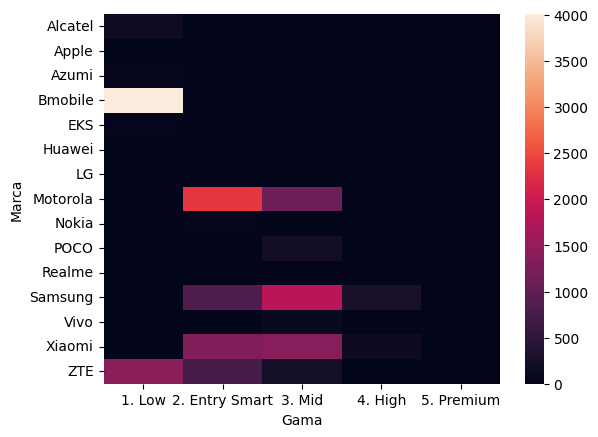

In [ ]:
#¿Hay alguna relación entre la marca y la gama?
tab = pd.crosstab(bsn['Marca'],bsn['Gama'])

sns.heatmap(tab)
plt.show()

En este segundo Headmap observamos que de la marca Bmobile se venden más equipos de gama baja.

### 5. Nivel Data Analyst

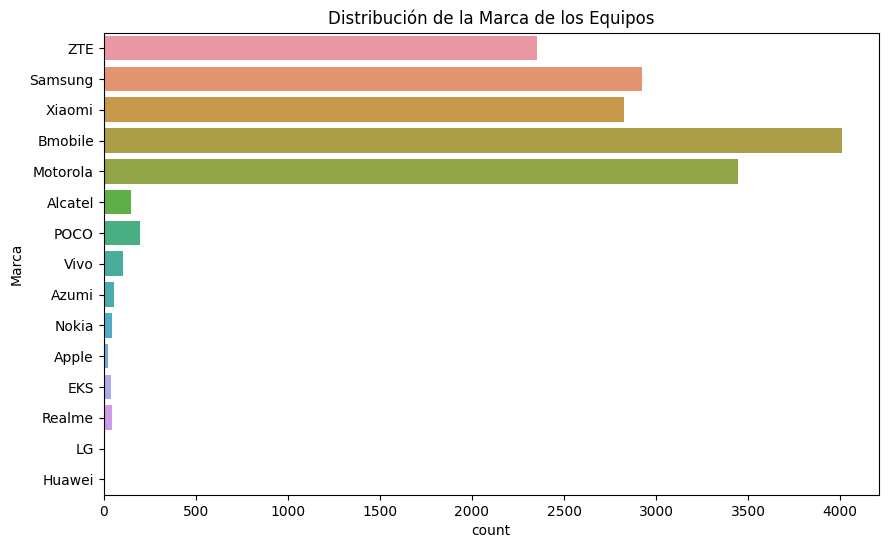

In [ ]:
# a.¿Cuál es la distribución de la Marca de los equipos?

plt.figure(figsize=(10, 6))
 sns.countplot(data=bsn, y='Marca')
plt.title('Distribución de la Marca de los Equipos')
plt.show()

Se observa que la marca Bmobile presenta la mayor cantidad de equipos vendidos, siendo Apple la marca que posee la menor cantidad de ventas.

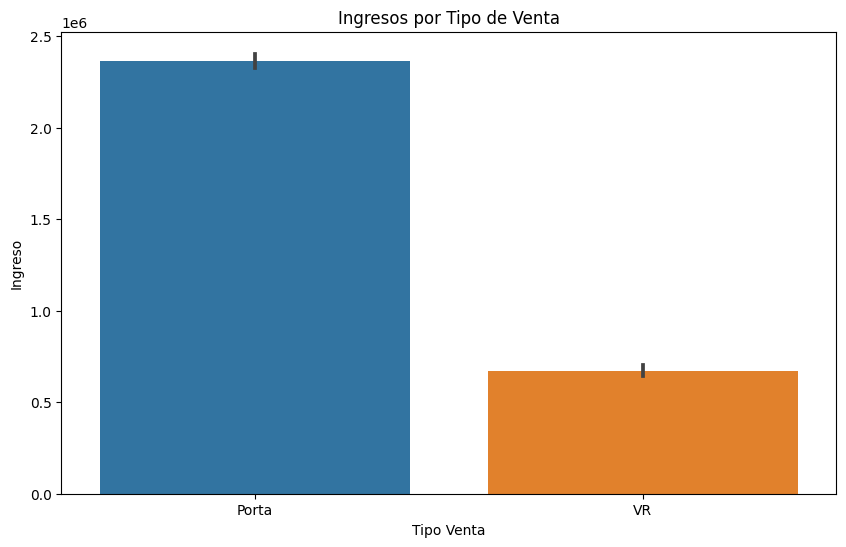

In [ ]:
# b. ¿Que Tipo Venta trae más ingresos, Porta o VR?

# Filtrando tipo de venta "reno"
bsn=bsn[bsn['Tipo Venta'] != 'Reno']

plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo Venta', y='Ingreso', data=bsn, estimator=sum)
plt.title('Ingresos por Tipo de Venta')
plt.show()

Realizando una comparación entre los ingresos por tipo venta Porta o VR, podemos afirmar que Porta es el tipo de venta que mayor ingresos genera.

In [73]:
# c. ¿Qué marca tiene mejor margen en el Clúster B?
# Filtramos el cluster B
bsn_cluster_b = bsn[bsn['Cluster'] == 'Cluster B']

mejor_margen = bsn_cluster_b.groupby('Marca')['Margen'].sum()
mejor_margen

Marca
Alcatel      -255.50745
Apple        -617.28820
Azumi         540.39492
Bmobile     16981.91641
EKS           126.07507
Huawei        -80.32700
LG           -485.98720
Motorola   -98350.16821
Nokia         172.66680
POCO         -879.86530
Realme        575.93350
Samsung    -25660.48878
Vivo          837.77320
Xiaomi       4823.89792
ZTE         -3147.22747
Name: Margen, dtype: float64

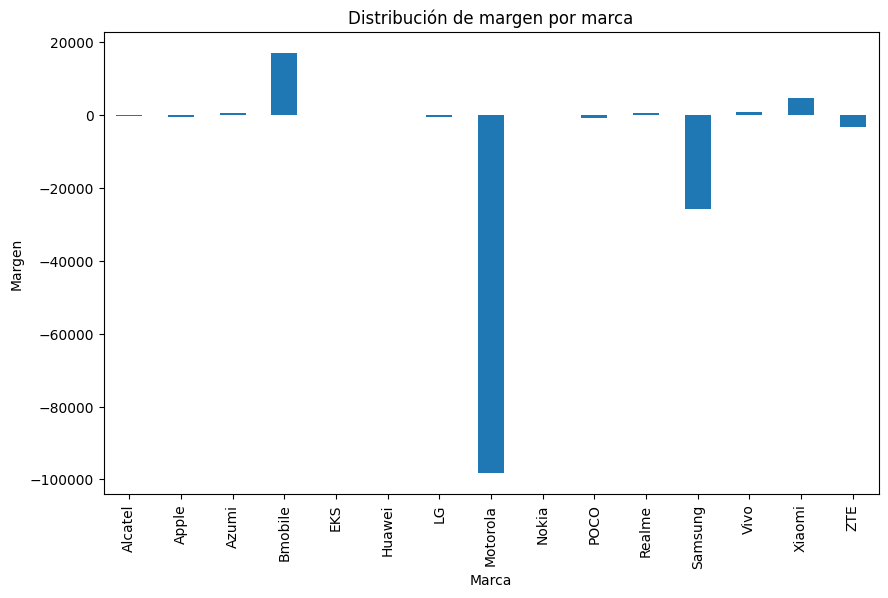

In [74]:
mejor_margen.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de margen por marca')
plt.xlabel('Marca')
plt.ylabel('Margen')
plt.show()

En el cluster B, el mejor margen lo tiene la marca Bmobile con 16,981.92.

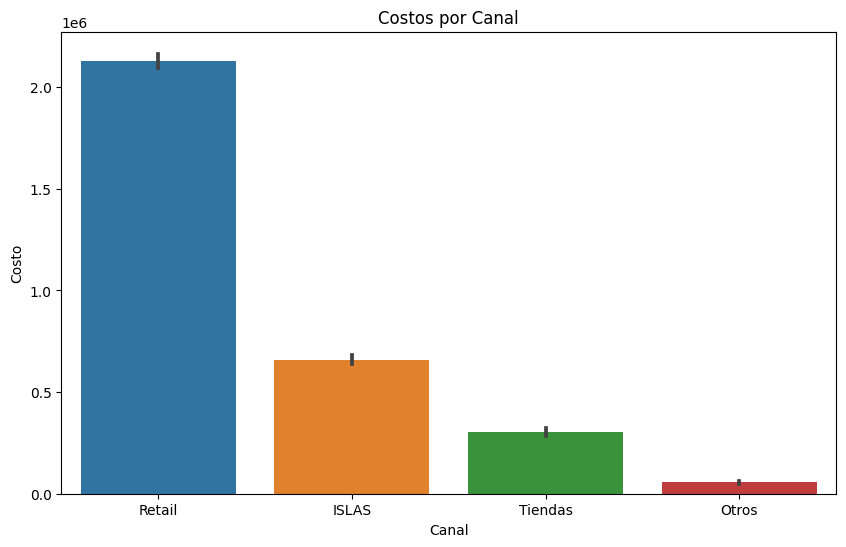

In [ ]:
# d. ¿Qué Canal tiene mayores costos?

plt.figure(figsize=(10, 6))
sns.barplot(x='Canal', y='Costo', data=bsn, estimator=sum)
plt.title('Costos por Canal')
plt.show()

El canal con mayores costos es el Retail.

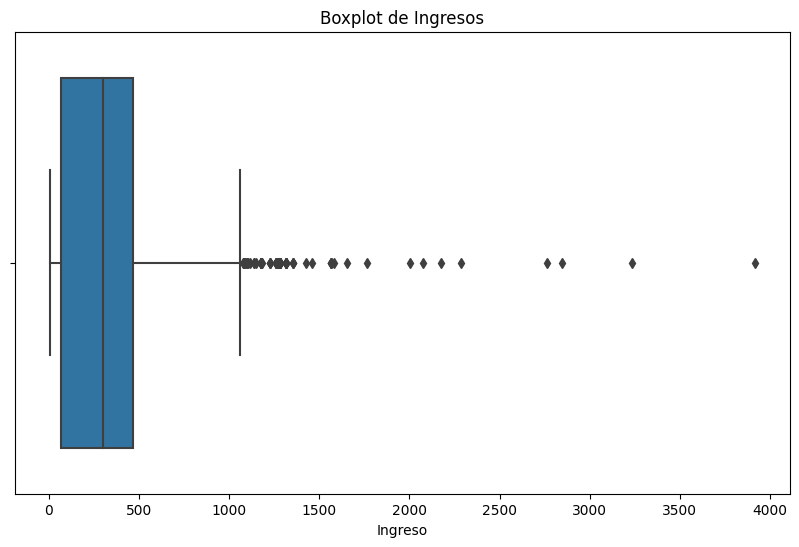

In [ ]:
# e. ¿Cómo están distribuidos los ingresos?, haga un boxplot y un histograma para explicar

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ingreso', data=bsn)
plt.title('Boxplot de Ingresos')
plt.show()


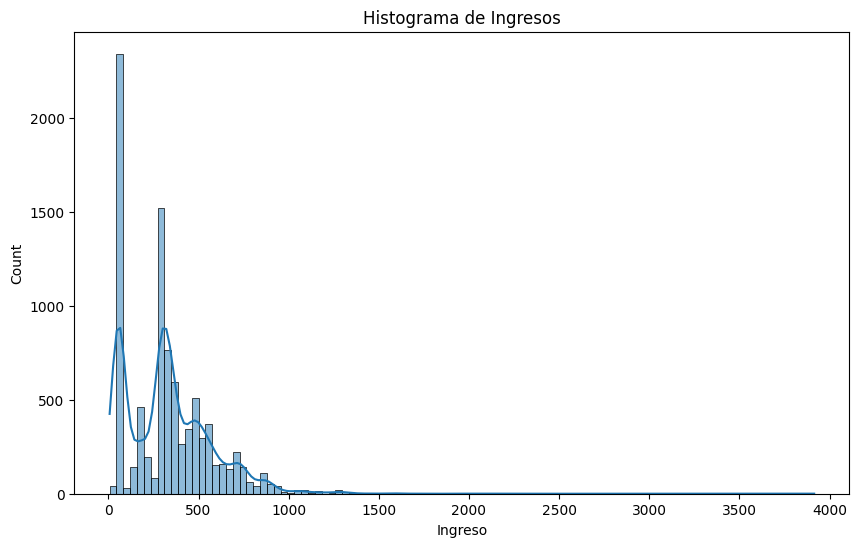

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bsn['Ingreso'], kde=True)
plt.title('Histograma de Ingresos')
plt.show()

El boxplot y el histograma nos muestran que los ingresos tienen una distribución asimétrica concentrándose en el lado izquierdo, esto nos indica que los ingresos percibidos son bajos.

In [76]:
# f. ¿Qué día del mes tuvo más ingresos? (Use la variable Ingreso)

dia_mayor_ingresos = bsn.groupby('Dia')['Ingreso'].sum()
dia_mayor_ingresos

Dia
1     140904.822570
2     169231.822420
3     188944.922560
4     205475.535240
5     190387.497430
6     195878.919880
7     163236.429280
8     175790.937670
9     187579.514830
10    189892.619030
11    197912.326840
12    205739.473110
13    172611.273890
14    162273.839820
15    141140.908620
16    148393.881394
17    183490.291984
18    181178.414430
19    181393.646410
20    182752.695810
21    207551.117540
22    157851.422900
23    135929.617930
24     71687.466990
25    186162.893490
26    169188.303090
27    160896.425750
28    156198.053610
29    150957.754786
30    165540.781080
31    191437.945230
Name: Ingreso, dtype: float64

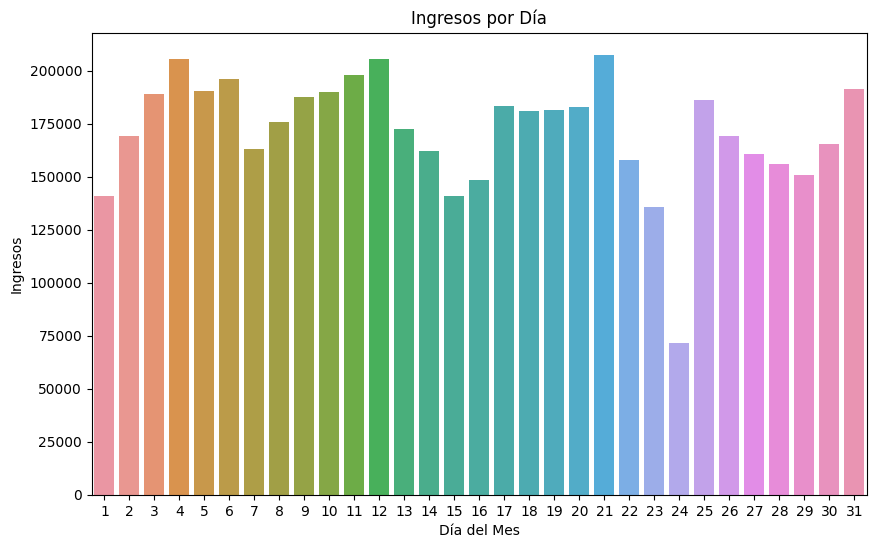

In [77]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=dia_mayor_ingresos.index, y=dia_mayor_ingresos.values)
plt.title('Ingresos por Día')
plt.xlabel('Día del Mes')
plt.ylabel('Ingresos')
plt.show()

Según nos muestra el gráfico, el día 21 es el día que se otuvo más ingresos.

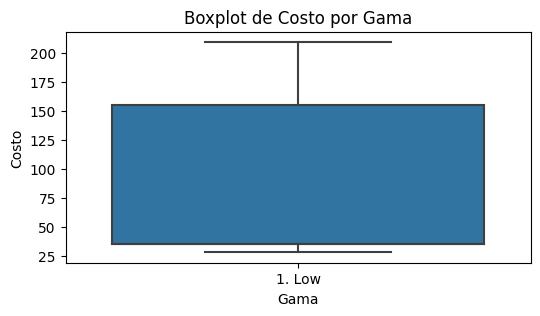

La media es:  73.06
35.31
0    35.31
Name: Costo, dtype: float64
63.21619757638308


In [ ]:
# g. Realice un boxplot de la variable Costo y explíquelo a detalle indicando el Promedio,
# Máximo, Mínimo y Desviación estándar. Aplique la librería seaborn y separelo por gama

bsn_gama1 = bsn[bsn['Gama'] == '1. Low']

plt.figure(figsize=(6, 3))
sns.boxplot(x='Gama', y='Costo', data=bsn_gama1)
plt.title('Boxplot de Costo por Gama')
plt.show()

print("La media es: " , bsn_gama1['Costo'].mean().round(2))
print("La mediana es: ", bsn_gama1['Costo'].median().round(2))
print("La moda es: ", bsn_gama1['Costo'].mode())
print("La desviación estandar es: ", bsn_gama1['Costo'].std(numeric_only=True))

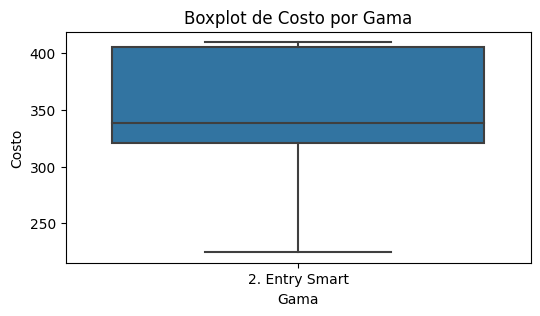

La media es:  357.93
La mediana es:  338.16
La moda es:  0    406.99
Name: Costo, dtype: float64
La desviación estandar es:  45.532179621854326


In [ ]:
bsn_gama2 = bsn[bsn['Gama'] == '2. Entry Smart']

plt.figure(figsize=(6, 3))
sns.boxplot(x='Gama', y='Costo', data=bsn_gama2)
plt.title('Boxplot de Costo por Gama')
plt.show()

print("La media es: " , bsn_gama2['Costo'].mean().round(2))
print("La mediana es: ", bsn_gama2['Costo'].median().round(2))
print("La moda es: ", bsn_gama2['Costo'].mode())
print("La desviación estandar es: ", bsn_gama2['Costo'].std(numeric_only=True))

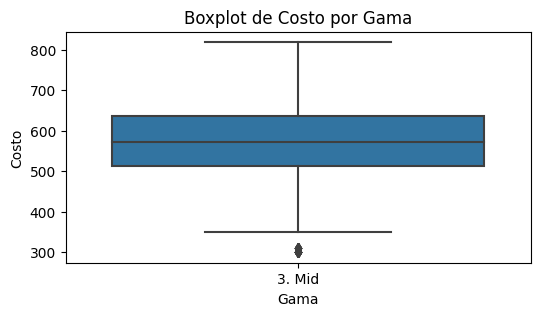

La media es:  580.43
La mediana es:  573.04
La moda es:  0    438.27
Name: Costo, dtype: float64
La desviación estandar es:  105.09519704146182


In [ ]:
bsn_gama3 = bsn[bsn['Gama'] == '3. Mid']

plt.figure(figsize=(6, 3))
sns.boxplot(x='Gama', y='Costo', data=bsn_gama3)
plt.title('Boxplot de Costo por Gama')
plt.show()

print("La media es: " , bsn_gama3['Costo'].mean().round(2))
print("La mediana es: ", bsn_gama3['Costo'].median().round(2))
print("La moda es: ", bsn_gama3['Costo'].mode())
print("La desviación estandar es: ", bsn_gama3['Costo'].std(numeric_only=True))

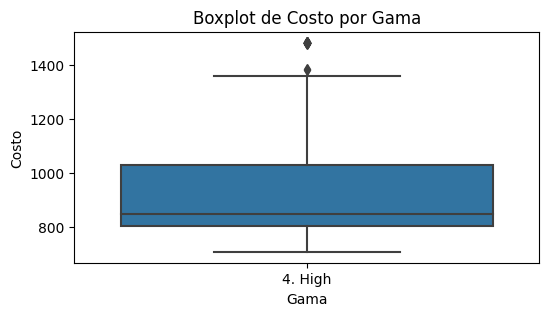

La media es:  945.36
La mediana es:  845.6
La moda es:  0    790.5
Name: Costo, dtype: float64
La desviación estandar es:  200.2826578874775


In [ ]:
bsn_gama4 = bsn[bsn['Gama'] == '4. High']

plt.figure(figsize=(6, 3))
sns.boxplot(x='Gama', y='Costo', data=bsn_gama4)
plt.title('Boxplot de Costo por Gama')
plt.show()

print("La media es: " , bsn_gama4['Costo'].mean().round(2))
print("La mediana es: ", bsn_gama4['Costo'].median().round(2))
print("La moda es: ", bsn_gama4['Costo'].mode())
print("La desviación estandar es: ", bsn_gama4['Costo'].std(numeric_only=True))

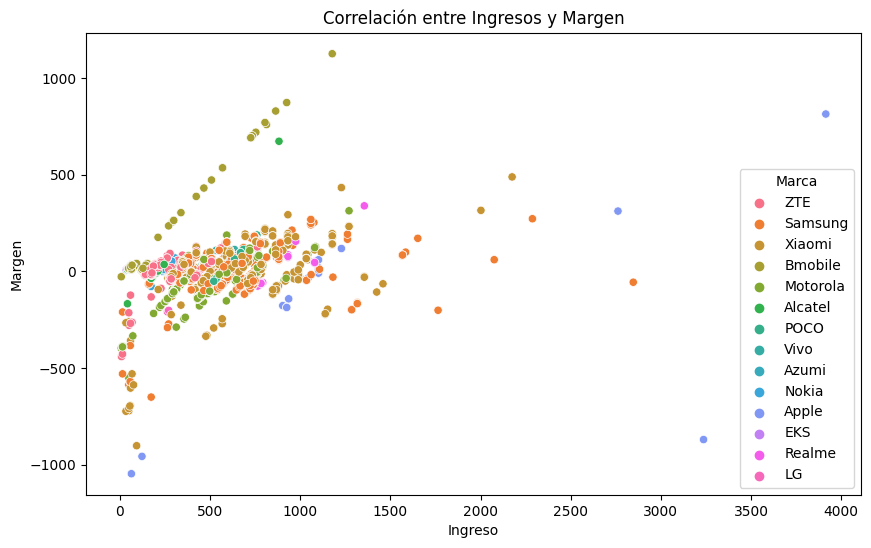

In [ ]:
# h. Haga un gráfico de correlación entre los ingresos y el Margen, utilice la librería seaborn para poder utilizar hue=Marca

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ingreso', y='Margen', data=bsn, hue='Marca')
plt.title('Correlación entre Ingresos y Margen')
plt.show()

Se observa en la siguiente gráfica de correlación que los márgenes más altos los tiene la marca Bmobile quien tiene ingresos bajos. En general se puede ver que se venden más equipos de ingresos bajos como de las gamas bajas.

### 6. Conclusiones

Según la data mostrada podemos indicar que la empresa no está siendo rentable ya que en la mayoría de sus ventas muestra márgenes negativos.

El canal venta que más venta obtiene es las grandes tiendas, donde el canal Retail es la que predomina.

La marca Bmobile es la que más se vende entre todos los canales, pero al ser parte de la gama baja su ingreso es bajo, por lo cual no compensa la perdida total de las otras marcas de gama media y alta.

Es necesario que la empresa presente unas estrategias de compra y venta más eficientes para evitar que los márgenes caigan en negativo.
